In [1]:
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [2]:
import os
import pandas

files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [3]:
csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pandas.read_csv(csv_file)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Problem Understanding
* **Objective**: Predict customer churn (binary classification: "Yes" or "No") and identify actionable insights to reduce churn.
* **Target Column**: Churn
* Ensure interpretability for business stakeholders and explore the impact of customer attributes on churn

# Data Exploration and Preprocessing

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [8]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


In [9]:
df['TotalCharges'] = pandas.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.drop(['customerID'], axis=1, inplace=True)

In [12]:
for column in df.select_dtypes(include=['object']).columns:
  print(df[column].value_counts())
  print("-"*40)

gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
----------------------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
---

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5901
1,1142


## Data Transformation

* **Label encoding for binary categories**: gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod
* **Scaling numerical variables using MinMaxScaler**: tenure, MonthlyCharges, TotalCharges

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [16]:
label_cols = df.select_dtypes(include=['object']).columns

df[label_cols] = df[label_cols].apply(lambda col: LabelEncoder().fit_transform(col))

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

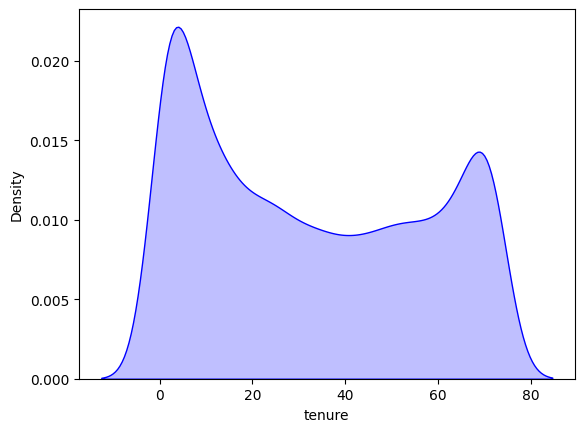

In [18]:
plt.figure(figure=(8,5))
sns.kdeplot(df['tenure'], color='blue', fill=True)
plt.show()

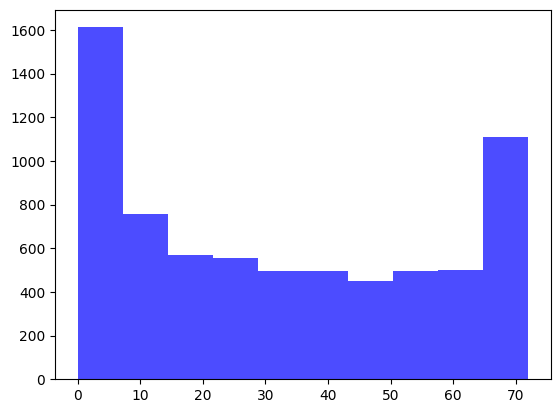

In [19]:
plt.figure(figure=(8,5))
plt.hist(df['tenure'], color='blue', alpha=0.7)
plt.show()

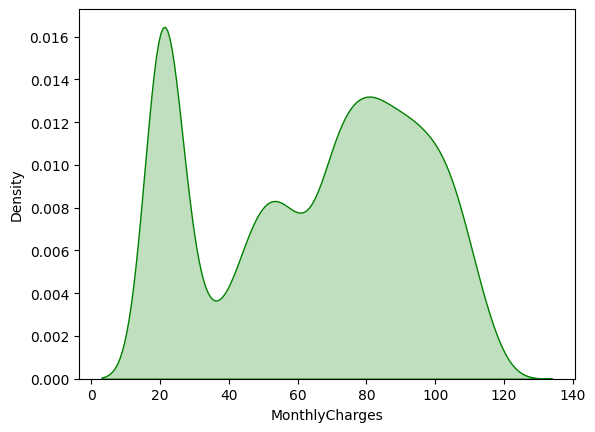

In [20]:
plt.figure(figure=(8,5))
sns.kdeplot(df['MonthlyCharges'], fill=True, color='green')
plt.show()

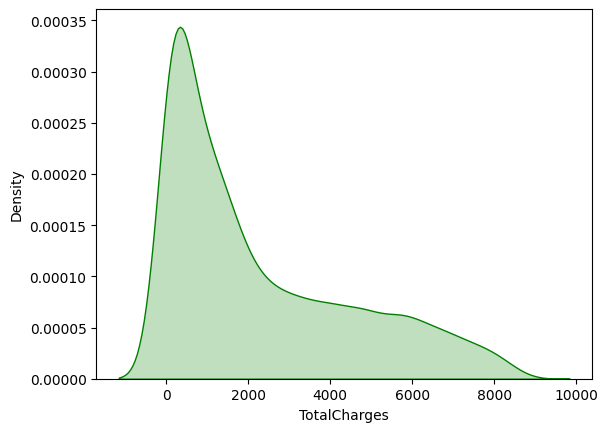

In [21]:
plt.figure(figure=(8,5))
sns.kdeplot(df['TotalCharges'], color='green', fill=True)
plt.show()

In [22]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

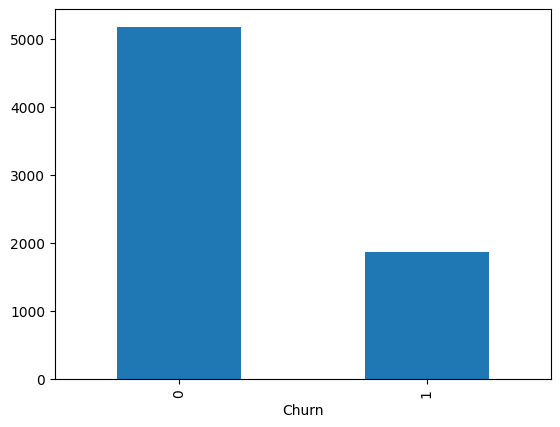

In [23]:
df.Churn.value_counts().plot(kind='bar')
plt.show()

# Model Building

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = reg.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)*100

81.61816891412349

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [51]:
reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [52]:
y_pred = reg.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)*100

81.61816891412349

In [54]:
reg = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [55]:
y_pred = reg.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)*100

81.61816891412349

In [58]:
reg = LogisticRegression(C=0.5, penalty='l2', solver='newton-cg')
reg.fit(X_train, y_train)

LogisticRegression(C=0.5, solver='newton-cg')

In [59]:
y_pred = reg.predict(X_test)
accuracy_score(y_test, y_pred)*100

81.61816891412349

In [26]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_
print(f"Test accuracy of the best model: {best_model.score(X_test, y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.7987219878298065
Test accuracy of the best model: 0.8161816891412349


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

best_model_rf = grid_search_rf.best_estimator_
print(best_model_rf.score(X_test, y_test))

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.8044010962945685
0.8055358410220014


In [34]:
y_pred = best_model_rf.predict(X_test)
accuracy_score(y_test, y_pred)*100

80.55358410220013

## XGBoost

In [29]:
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [50, 100],  # Reduced number of boosting rounds
    'max_depth': [3, 5],  # Maximum depth of trees
    'learning_rate': [0.1, 0.3],  # Learning rate
    'subsample': [0.8],  # Fraction of samples for each tree (fixed to 0.8)
    'colsample_bytree': [0.8]  # Fraction of features for each tree (fixed to 0.8)
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters found: ", grid_search_xgb.best_params_)
print(f"Best cross-validation score: {grid_search_xgb.best_score_}")

best_xgb_model = grid_search_xgb.best_estimator_
print(f"Test accuracy of the best XGBoost model: {best_xgb_model.score(X_test, y_test)}")

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation score: 0.8044010962945686
Test accuracy of the best XGBoost model: 0.8126330731014905


## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [50, 100],  # Number of boosting rounds
    'learning_rate': [0.1, 0.3],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples to split
    'min_samples_leaf': [1, 2]  # Minimum samples at leaf node
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)

print("Best parameters found: ", grid_search_gb.best_params_)
print(f"Best cross-validation score: {grid_search_gb.best_score_}")

best_gb_model = grid_search_gb.best_estimator_
print(f"Test accuracy of the best Gradient Boosting model: {best_gb_model.score(X_test, y_test)}")


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.8004969826056089
Test accuracy of the best Gradient Boosting model: 0.808374733853797


## LightGBM

In [40]:
import lightgbm as lgb

param_grid_lgb = {
    'n_estimators': [50, 100],  # Reduced number of boosting rounds
    'learning_rate': [0.1, 0.3],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of trees
    'num_leaves': [31],  # Fixed number of leaves (default value)
}

grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, cv=3)
grid_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 998, number of negative: 2758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265708 -> initscore=-1.016508
[LightGBM] [Info] Start training from score -1.016508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'num_leaves': [31]})

In [41]:
print("Best parameters found: ", grid_search_lgb.best_params_)
print(f"Best cross-validation score: {grid_search_lgb.best_score_}")

best_lgb_model = grid_search_lgb.best_estimator_
print(f"Test accuracy of the best LightGBM model: {best_lgb_model.score(X_test, y_test)}")

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 31}
Best cross-validation score: 0.8008519701810437
Test accuracy of the best LightGBM model: 0.8097941802696949


# Analyzing feature importance using SHAP or LIME

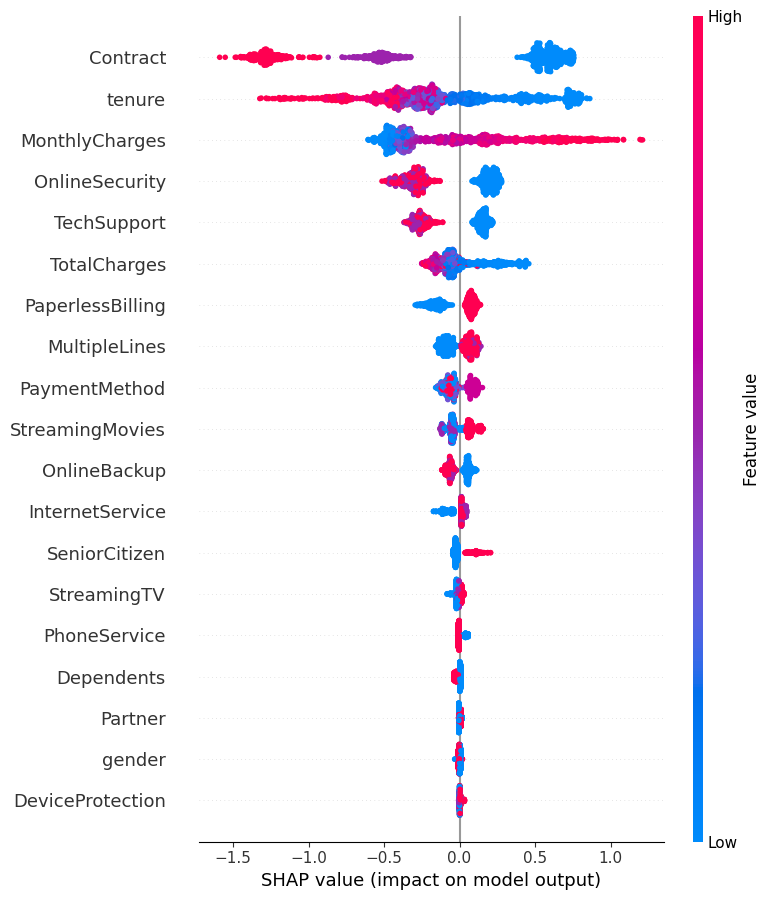

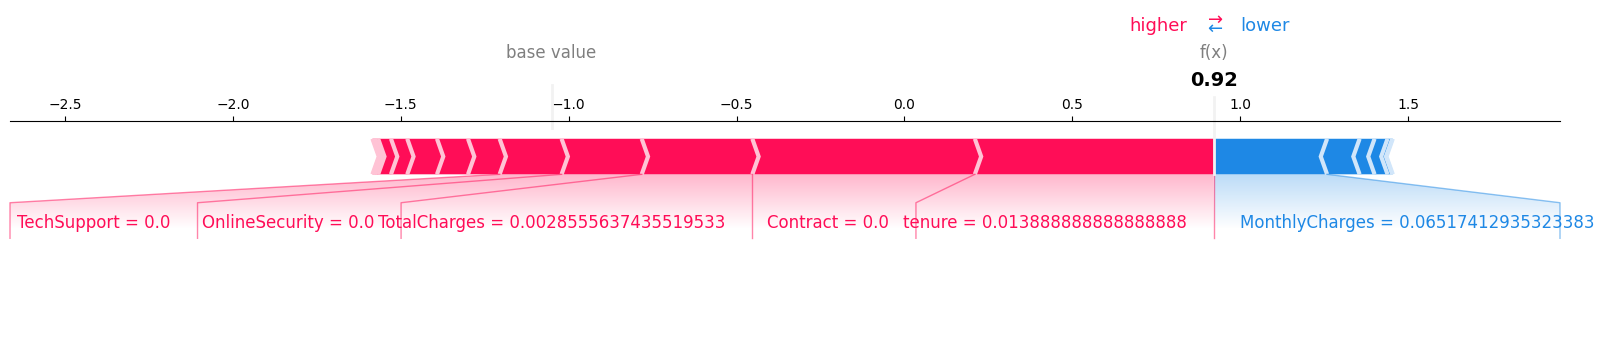

In [42]:
import shap

explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)

In [44]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=39308c9769c6293e505d3387c3a3f4d539e3edd9bd1dae59903563b6b1d5f8a4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [45]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],  # Replace with your target class names
    mode='classification'
)

# Explain a single instance (first test instance)
exp = explainer.explain_instance(
    data_row=X_test.iloc[0].values,  # Single test sample
    predict_fn=best_xgb_model.predict_proba  # Prediction function of your model
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)


## SHAP summary plot Analysis

#### Top Features:
* Contract: Highly influential; shorter contracts (e.g., month-to-month) likely contribute to higher churn.
* tenure: Customers with lower tenure (shorter time with the company) tend to churn more.
* MonthlyCharges: Higher monthly charges are associated with churn.
* OnlineSecurity and TechSupport: Customers without these services (low values in blue) are more likely to churn.

#### Relationships Between Features and Target
* tenure: Shorter tenures (low feature values in blue) are associated with higher churn.
* OnlineSecurity and TechSupport: Absence of these services (blue dots) increases churn probability.
* PaperlessBilling: Customers with Paperless Billing (pink/red) tend to churn more.

#### Insights for Churn Reduction
To reduce churn, focus on:

* Contract: Encourage customers to switch to long-term contracts to reduce churn.
* OnlineSecurity and TechSupport: Promote or bundle these services to customers who do not have them.
* High Monthly Charges: Provide discounts or lower-cost plans to high-spending customers to retain them.
* New Customers (Low Tenure): Improve onboarding experiences to retain customers early in their lifecycle.

#### Less Important Features
Features like gender, Partner, Dependents, and DeviceProtection have relatively lower importance in the model, as seen from the shorter SHAP values.